In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.patches as mpatches

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings("ignore")
RS = 2023


In [2]:
df = pd.read_csv('./creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

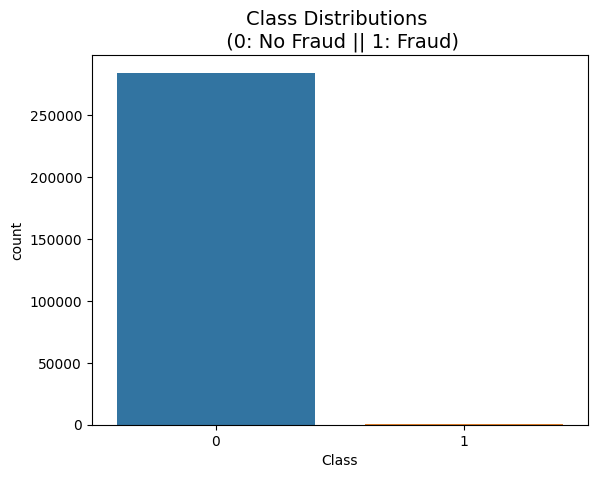

In [3]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')
sns.countplot(x=df['Class'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

(0.0, 172792.0)

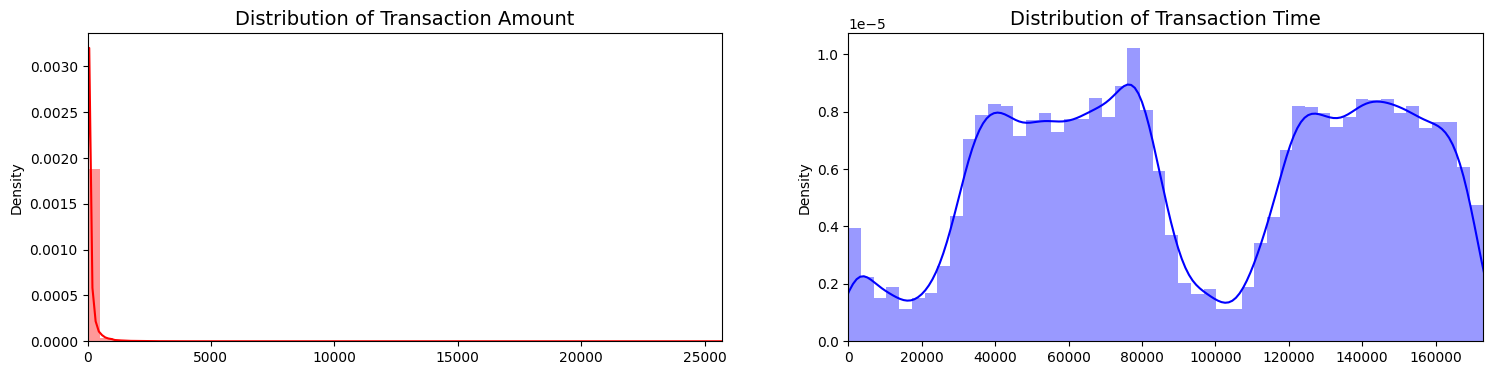

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.describe()
X = df.drop('Class', axis=1)
y = df['Class']


In [6]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}
Cross Validation Score 99.95%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.87      0.69      0.77        90

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



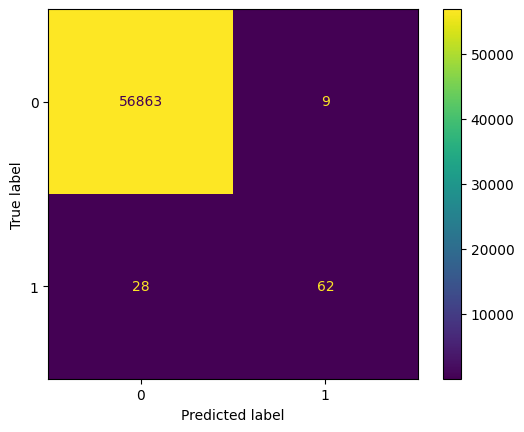

In [7]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(X_train, Y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [8]:
x_train, y_train = RandomUnderSampler(random_state=RS).fit_resample(X_train, Y_train)

T-SNE took 1.3 s
PCA took 0.01 s


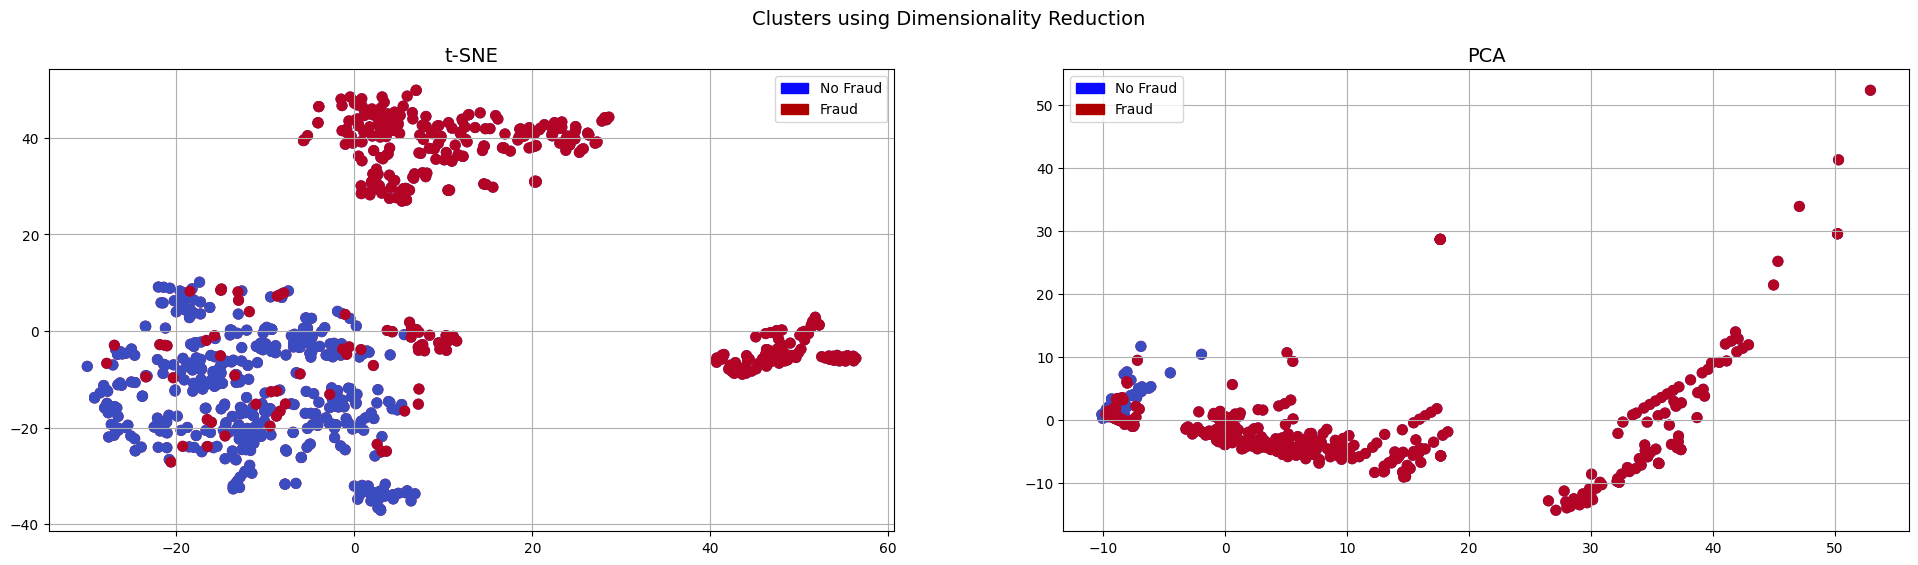

In [9]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}
Cross Validation Score 92.41%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56872
           1       0.05      0.82      0.10        90

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.54     56962
weighted avg       1.00      0.98      0.99     56962



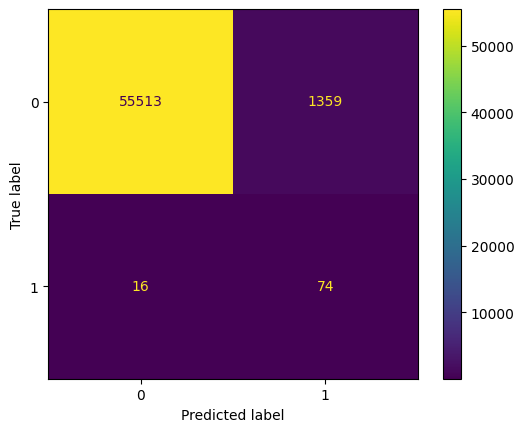

In [10]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [11]:
# NearMiss UnderSampling
x_train, y_train = NearMiss(version=3).fit_resample(X_train, Y_train)

T-SNE took 1.4 s
PCA took 0.004 s


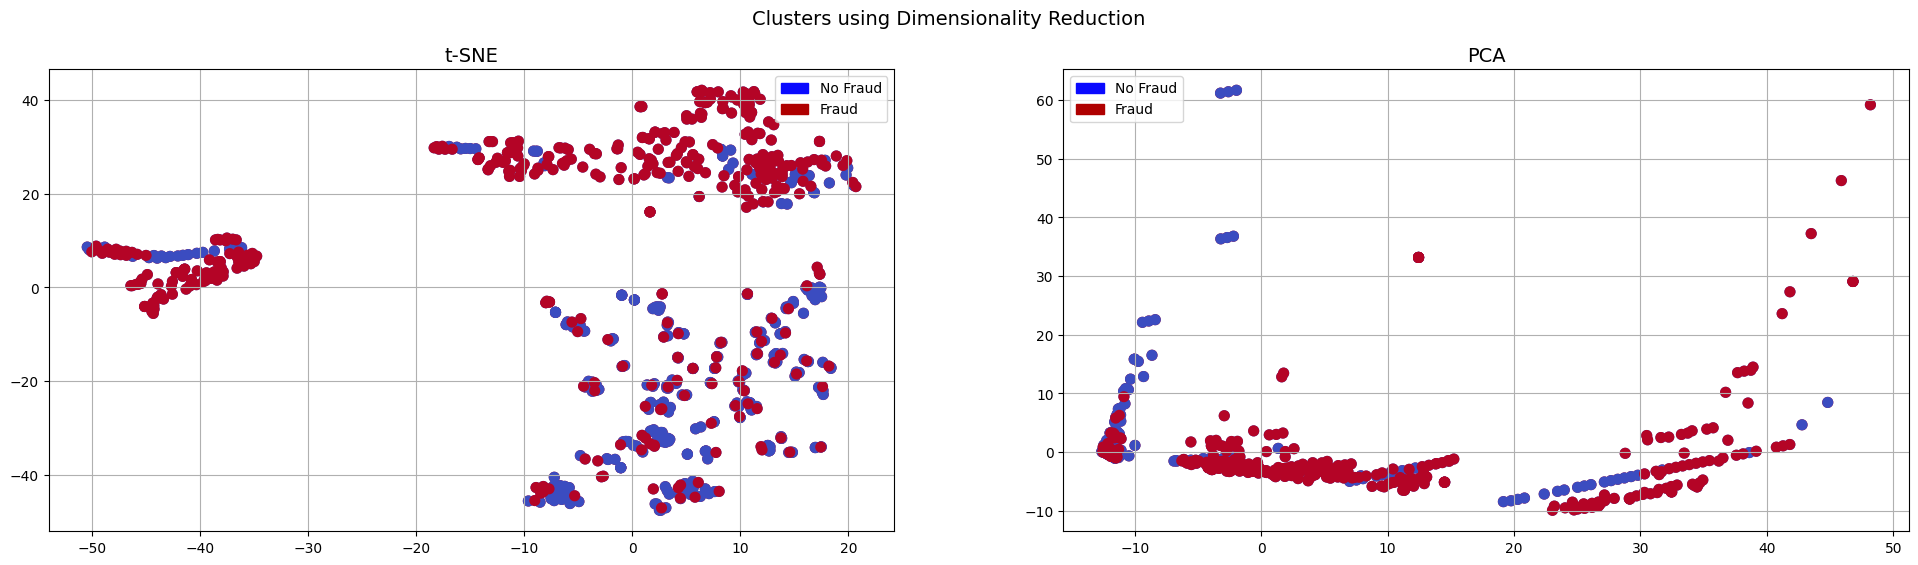

In [12]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}
Cross Validation Score 81.07%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56872
           1       0.09      0.77      0.15        90

    accuracy                           0.99     56962
   macro avg       0.54      0.88      0.57     56962
weighted avg       1.00      0.99      0.99     56962



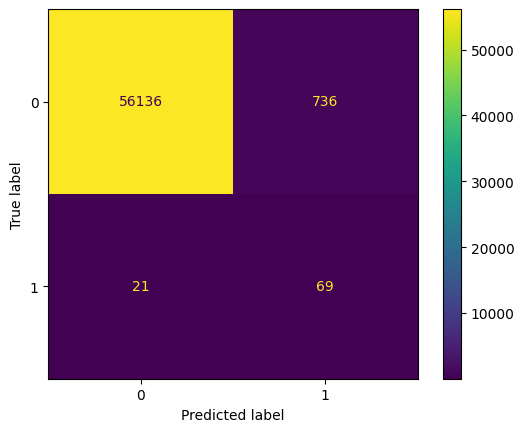

In [13]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

No Frauds 90.91 % of the dataset
Frauds 9.09 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

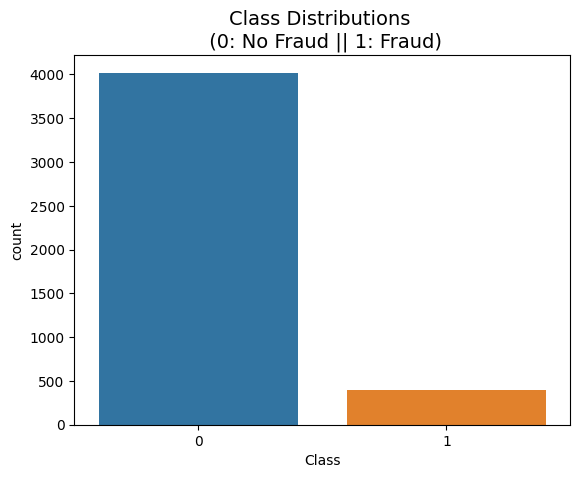

In [14]:
I0, I1 = (Y_train==0), (Y_train==1)
X_train0, X_train1 = X_train[I0], X_train[I1]
Y_train0, Y_train1 = Y_train[I0], Y_train[I1]
df_tmp = pd.concat([X_train0, Y_train0], axis=1)
df_tmp = df_tmp.sample(n=len(Y_train1) * 10, random_state=RS)
X_train0 = df_tmp.drop('Class', axis=1)
Y_train0 = df_tmp['Class']
X_train = pd.concat([X_train0, X_train1]).reset_index(drop=True)
Y_train = pd.concat([Y_train0, Y_train1]).reset_index(drop=True)
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(Y_train.value_counts()[0]/len(Y_train) * 100, 2), '% of the dataset')
print('Frauds', round(Y_train.value_counts()[1]/len(Y_train) * 100, 2), '% of the dataset')
sns.countplot(x = Y_train)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


In [15]:
# Random OverSampling
x_train, y_train = RandomOverSampler(random_state=RS).fit_resample(X_train, Y_train)

T-SNE took 1.7e+01 s
PCA took 0.017 s


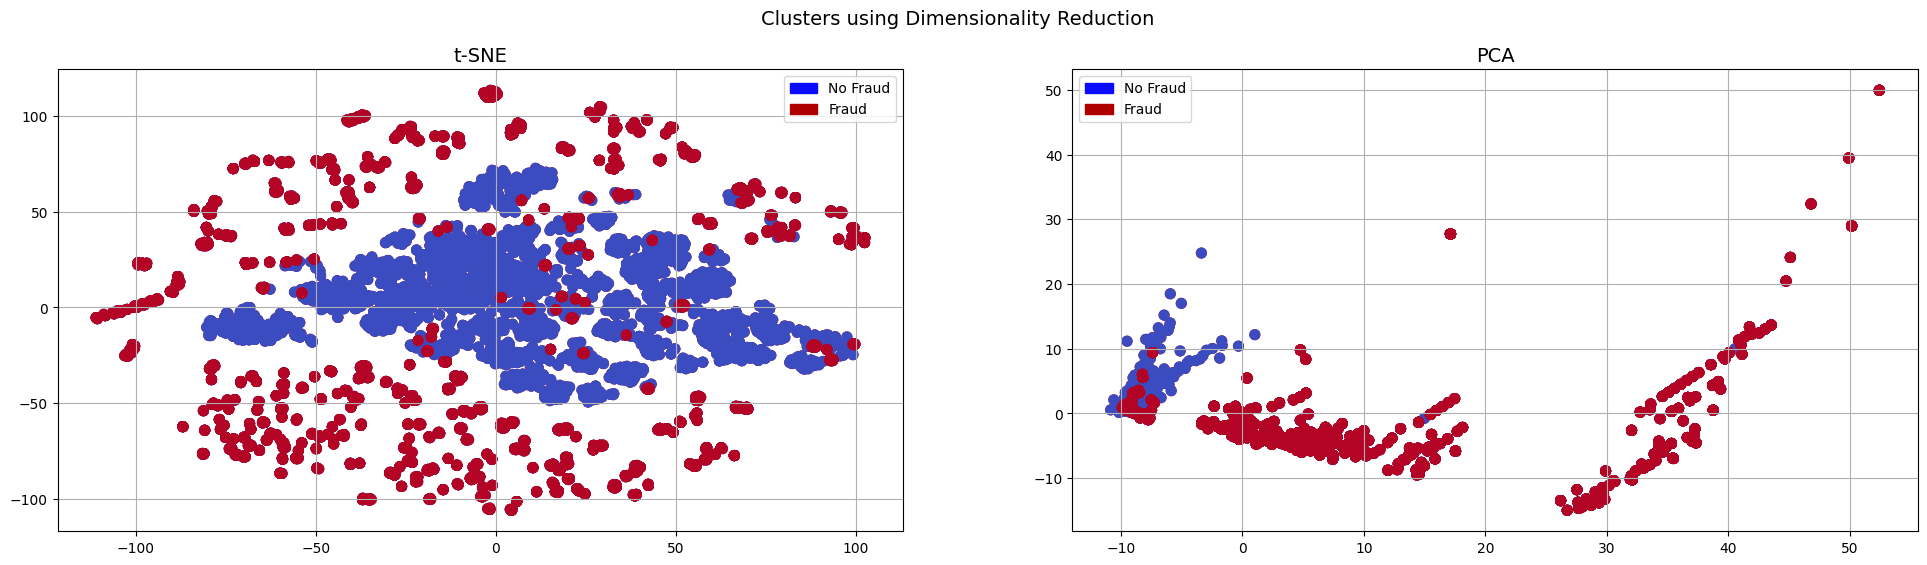

In [16]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3}
Cross Validation Score 98.66%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56872
           1       0.05      0.83      0.09        90

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.54     56962
weighted avg       1.00      0.97      0.99     56962



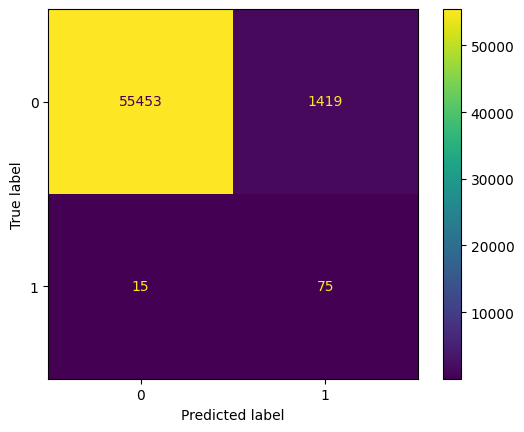

In [17]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [18]:
# SMOTE OverSampling
x_train, y_train = SMOTE(random_state=RS).fit_resample(X_train, Y_train)

T-SNE took 1.6e+01 s
PCA took 0.021 s


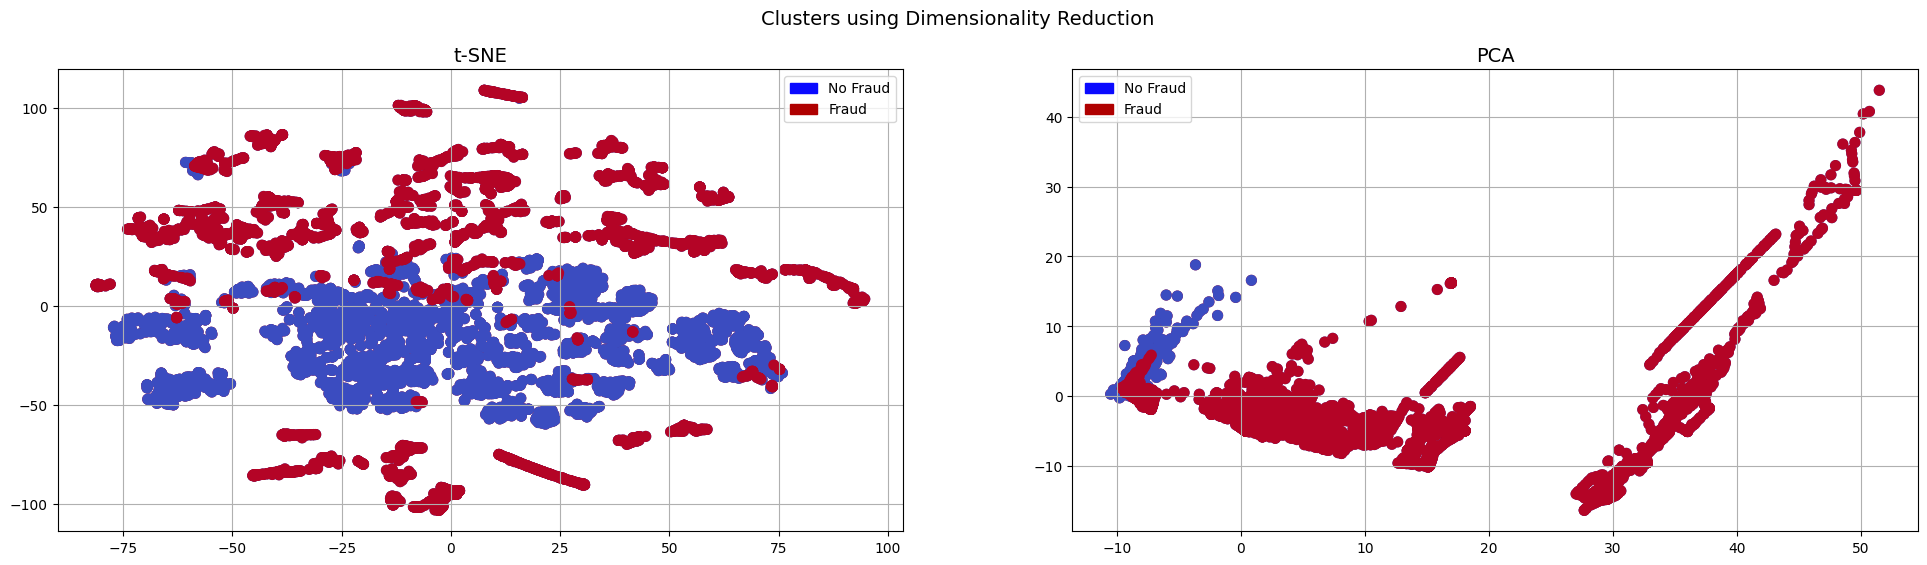

In [19]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}
Cross Validation Score 96.73%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56872
           1       0.04      0.88      0.08        90

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



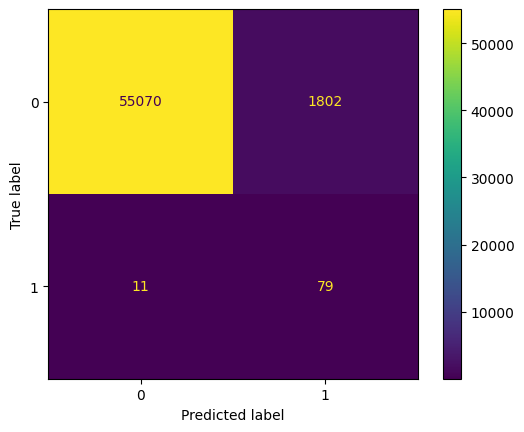

In [20]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [21]:
# SMOTE OverSampling
x_train, y_train = BorderlineSMOTE(random_state=RS).fit_resample(X_train, Y_train)

T-SNE took 1.6e+01 s
PCA took 0.021 s


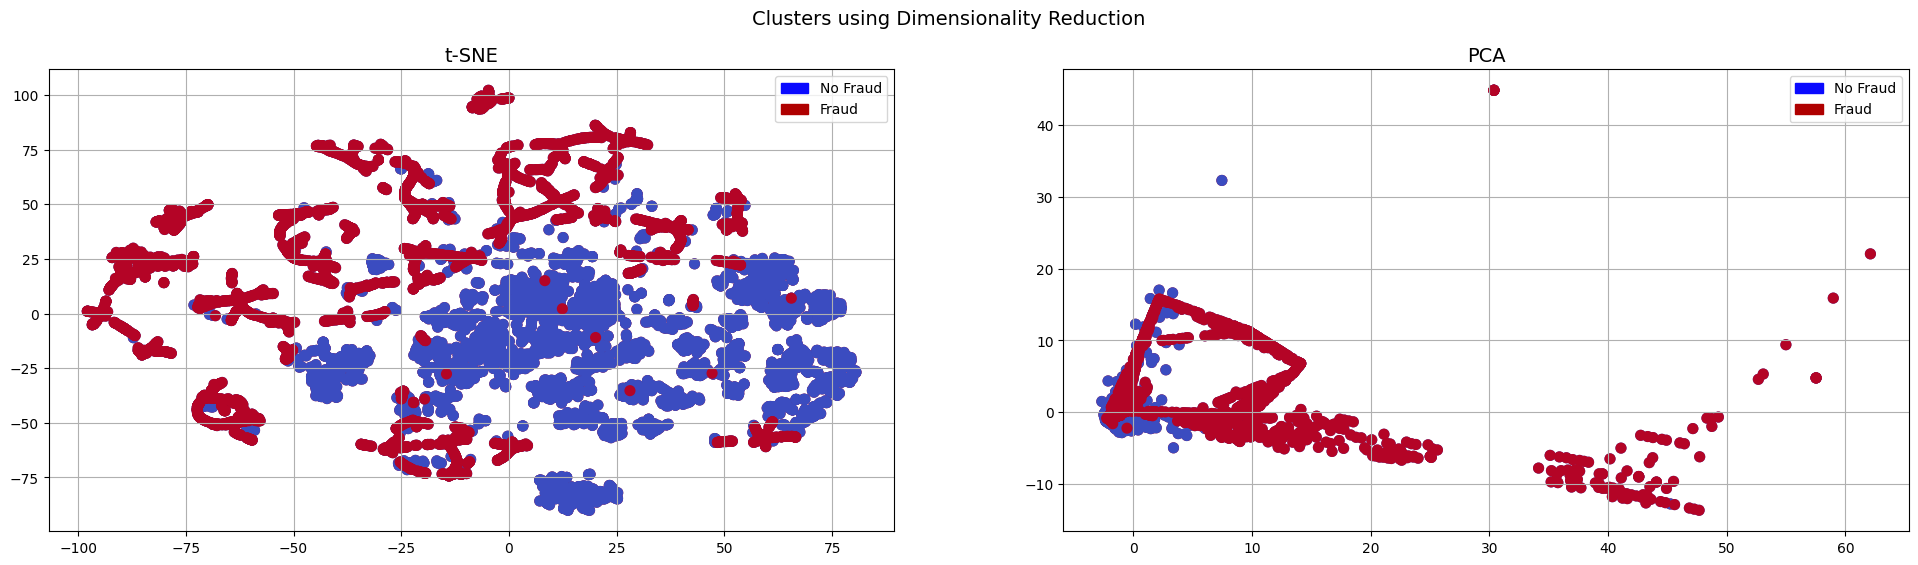

In [22]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}
Cross Validation Score 95.41%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56872
           1       0.03      0.86      0.05        90

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



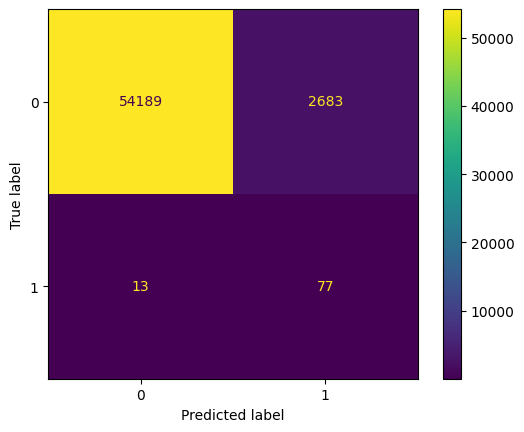

In [23]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [24]:
# ADASYN OverSapmling
x_train, y_train = ADASYN(random_state=RS).fit_resample(X_train, Y_train)

T-SNE took 1.6e+01 s
PCA took 0.017 s


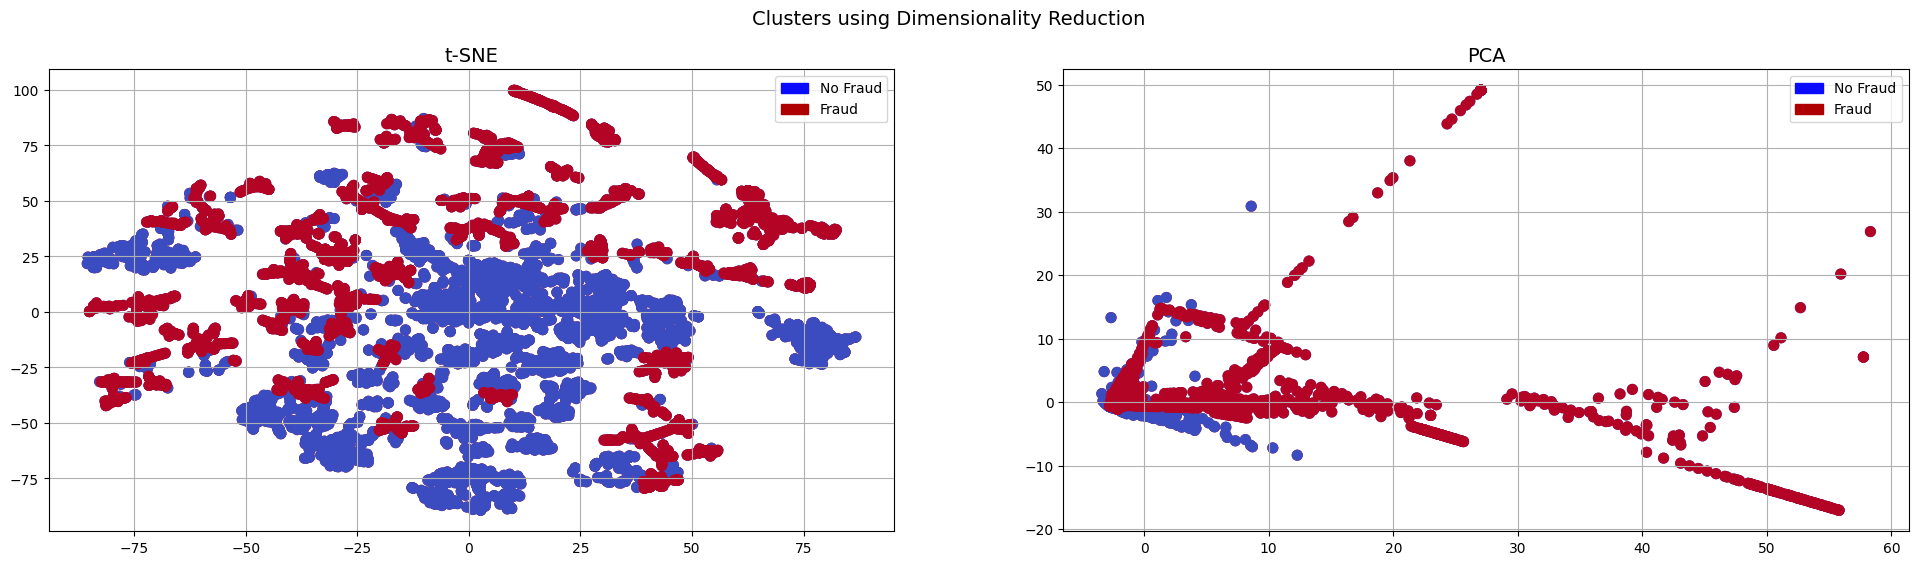

In [25]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=RS).fit_transform(x_train)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

Decision Tree: 
Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}
Cross Validation Score 89.56%
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56872
           1       0.02      0.84      0.03        90

    accuracy                           0.92     56962
   macro avg       0.51      0.88      0.50     56962
weighted avg       1.00      0.92      0.96     56962



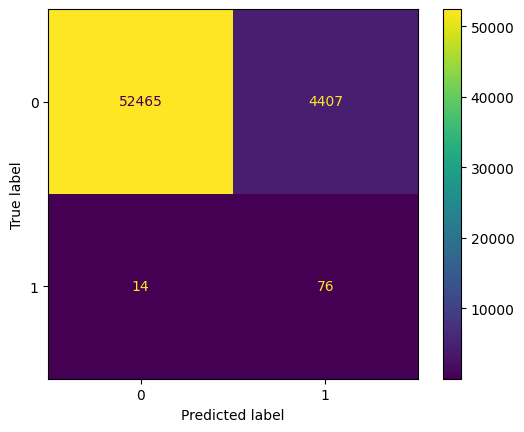

In [26]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(4,10,2)), 
              "min_samples_leaf": list(range(3,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=RS), tree_params, n_jobs=4)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_
y_pred = tree_clf.predict(X_test)
print('Decision Tree: ')
print('Best hyperparameters:', grid_tree.best_params_)
print('Cross Validation Score', round(grid_tree.best_score_ * 100, 2).astype(str) + '%')
print('Testing Classification Report:')
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()